<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/HW5/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ryan Hassell

First, we must import our data.

In [1]:
import pandas as pd

In [2]:
wine  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

wine

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


Now that I've imported the DF, let's go over what I intend to accomplish for this assignment.

This assignment involves predicting what type of wine a given sample of wine is, based off of it's alcohol and sugar content.

In order for us to do this, we first need to clean the data and get rid of any empty values.

In [3]:
wine.isna().any()

Type            False
Alcohol_flag    False
Sugar_flag      False
dtype: bool

We can see that there are no empty values present.

Now, we must encode the categoric attributes. We can do this by doing the following:

In [4]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [7]:
#create a dataframe for the wine
wine_encoded = pd.DataFrame()

# this statement only encodes attributes that are either boolean or categoric.
for x in range(0, wine.shape[1]):
    if wine.dtypes[x]=='object' or wine.dtypes[x]=='bool':
        wine_encoded[wine.columns[x]] = encoder.fit_transform(wine[wine.columns[x]])


print("Before encoding:\n")
print(wine)
print("\n")
print("After encoding:\n")
wine_encoded

Before encoding:

       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]


After encoding:



,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


Now that we've encoded our data, it's time to create some contingency tables.

In [13]:
#create alcohol contingency
alc_ct = pd.crosstab(wine_encoded.Type, wine_encoded.Alcohol_flag)

alc_ct

Alcohol_flag,0,1
Type,,
0,485,600
1,1176,1084


In [14]:
#create sugar contingency
sugar_ct = pd.crosstab(wine_encoded.Type, wine_encoded.Sugar_flag)

sugar_ct

Sugar_flag,0,1
Type,,
0,237,848
1,1382,878


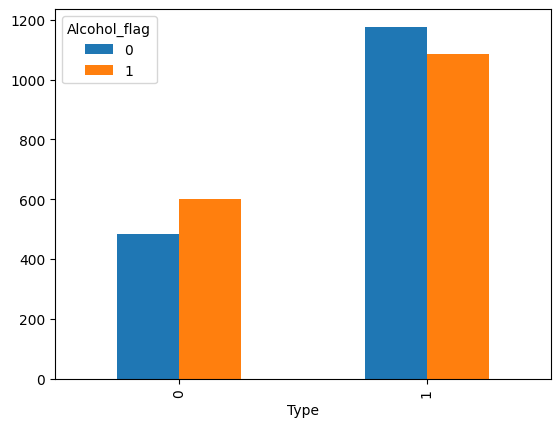

In [18]:
# create graph for alc_ct
alcplot = alc_ct.plot.bar()

(For reference, Orange in this graph represents red wine, blue represents white, and the 0 and 1 refer to the concentrations of alcohol. 0 referring to a high concentration, and 1 referring to a low concentration.)
From this graph, we can see that a small amount of red wines in the DF have a larger alcohol content than the whites. The opposite is true for for low concentration, there are more lowly-concentrated white wines than reds.

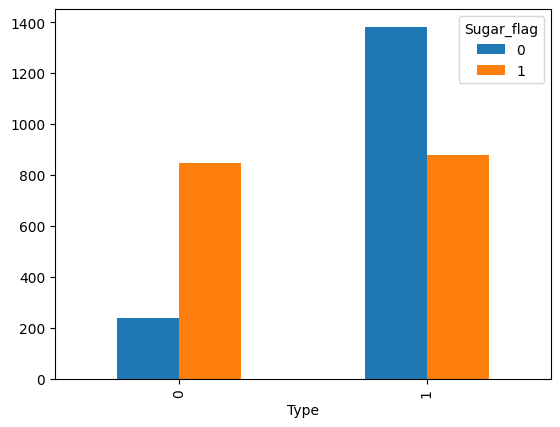

In [19]:
# create graph for sugar_ct
sugarplot = sugar_ct.plot.bar()

(For reference, Orange in this graph represents red wine, blue represents white, and the 0 and 1 refer to the concentrations of alcohol. 0 referring to a high concentration, and 1 referring to a low concentration.)
From this graph, we see that there are much more red wines with a higher sugar content than white wines, which are composed of mainly low sugar content variations.

Now, we must find:

The prior probability of type=red and type=white:

In [44]:
total = alc_ct.sum().sum()
# red
red_count = alc_ct.loc[0].sum()
red_pp = red_count / total
# white
white_count = alc_ct.loc[1].sum()
white_pp = white_count / total
print("Red's Prior Probability:",red_pp)
print("White's Prior Probability:",white_pp)

Red's Prior Probability: 0.3243647234678625
White's Prior Probability: 0.6756352765321375


This data tells us that white wine makes up around two thirds of the data, while red makes up only a third.

In [45]:
#high alc
high_counta = alc_ct[0].sum()
high_alc_prob = high_counta / total
#low alc
low_counta = alc_ct[1].sum()
low_alc_prob = low_counta / total
print("Probability of high alcohol content:", high_alc_prob)
print("Probability of low alcohol content:", low_alc_prob)

Probability of high alcohol content: 0.49656203288490286
Probability of low alcohol content: 0.5034379671150971


In [46]:
#high sugar
high_counts = sugar_ct[0].sum()
high_sugar_prob = high_counts / total
#low sugar
low_counts = sugar_ct[1].sum()
prob_low_sugar = low_counts / total
print("Probability of high sugar content:", high_sugar_prob)
print("Probability of low sugar content:", prob_low_sugar)

Probability of high sugar content: 0.48400597907324366
Probability of low sugar content: 0.5159940209267564


In [53]:
high_alc_given_red = alc_ct.loc[0, 0] / red_count
low_alc_given_red = alc_ct.loc[0, 1] / red_count

print("The probability of high alcohol given red is:", high_alc_given_red)
print("The probability of low alcohol given red is:", low_alc_given_red)

The probability of high alcohol given red is: 0.4470046082949309
The probability of low alcohol given red is: 0.5529953917050692


In [54]:
high_sugar_given_red = sugar_ct.loc[0, 0] / red_count
low_sugar_given_red = sugar_ct.loc[0, 1] / red_count

print("The probability of high sugar given red is:", high_sugar_given_red)
print("The probability of low sugar given red is:", low_sugar_given_red)

The probability of high sugar given red is: 0.2184331797235023
The probability of low sugar given red is: 0.7815668202764977


In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()

# prepare input/output
X = wine_encoded.iloc[:,1:]
Y = wine_encoded.iloc[:, 0]
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, random_state=24, shuffle=True, test_size=0.30, stratify=Y)

# display
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2072             1           0
645              1           0
1219             1           1
1103             1           0
328              0           1
...            ...         ...
1569             0           1
2112             1           0
977              0           1
1320             0           1
1097             1           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
3312             0           0
3151             0           0
2313             1           0
725              1           0
2437             0           1
...            ...         ...
107              0           1
20               0           0
2278             1           1
2802             0           0
167              1           1

[1004 rows x 2 columns]


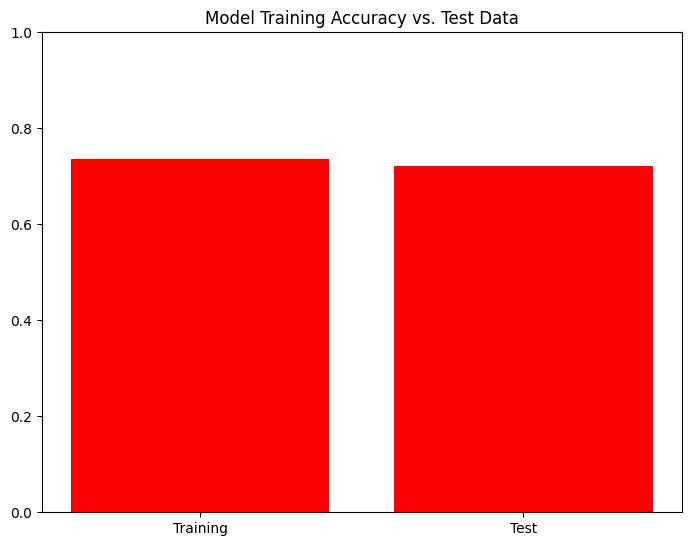

In [69]:
import matplotlib.pyplot as plt

# first we train the model
NBmodel.fit(X_train, Y_train)

# then calculate the model accuracy
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, Y_train), NBmodel.score(X_test, Y_test)]


# and plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Training Accuracy vs. Test Data')
ax.bar(labels, scores, color="red")
ax.set_ylim(0, 1)
plt.show()

#Summary



*   Red wine tends to have lower alcohol content, and lower sugar content than white wine.
*   Red wine is ~66% more likely to have lower sugar
*   White wine has more alcohol and sugar content.
*   There are over double the amount of white wine entries in the DF than red wine.
*   For most of the tests for question eight, the accuracy was around **seventy percent**.

